In [1]:
import pandas as pd
import yfinance as yf
import igraph as ig
from tqdm import tqdm

In [2]:
const = pd.read_csv("russell_1000.csv", sep = ';', header=0)
const.head()

,Symbol,Description,Category2,Category3,GICS Sector,Market cap,Dividend yield,Country,Action
0,MSFT,Microsoft Corp,Common stocks,Large cap,Information Technology,"$2,495,877,938,999",0.67%,USA,Analyze
1,AAPL,Apple Inc,Common stocks,Large cap,Information Technology,"$2,426,013,924,390",0.58%,USA,Analyze
2,GOOG,Alphabet Inc Class C,Common stocks,Large cap,Communication Services,"$1,981,599,901,640",0.00%,USA,Analyze
3,GOOGL,Alphabet Inc Class A,Common stocks,Large cap,Communication Services,"$1,981,599,901,640",0.00%,USA,Analyze
4,AMZN,Amazon.Com Inc.,Common stocks,Large cap,Consumer Discretionary,"$1,761,070,110,450",0.00%,USA,Analyze


In [4]:
cons = const.Symbol
cons = cons.to_list()
cons_str = " ".join(cons)

In [6]:
raw_data = yf.Tickers(cons_str)

In [7]:
holders_dict = {}

for ticker in tqdm(cons):
    try:
        holders_dict[raw_data.tickers[ticker].info['shortName']] = raw_data.tickers[ticker].institutional_holders
    except:
        print(ticker)

 68%|██████▊   | 699/1026 [2:10:41<5:39:53, 62.36s/it]    

GWRE
LAMR
TPL
NWL
ZION
JNPR
MIDD
UAA
HRC
AZPN
ACM
FRT
VRT
AGL
TW
OLN
PEN
DOX
PENN
NI
KNX
CACC
ARMK
SMG
LAD
CPRI
TAP
G
PEGA
AA
SEE
FHN
Y
ST
CNXC
VST
UGI
CIEN
GL
STOR
GPS
PLTK
OC
WMS
AGCO

 71%|███████   | 725/1026 [2:10:41<2:23:41, 28.64s/it]


JBL
RL
BERY
AIZ
MKSI
UTHR
SEIC
IPGP
OSH
COTY
OGN
PLAN
XPO
CHDN
ITT
KSS
GNTX
BLD
PAG


 72%|███████▏  | 737/1026 [2:10:41<1:37:57, 20.34s/it]

PVH
VNO
SMAR
ARW
NRG
CBSH
CFR
DXC
ATR
TNDM
ZNGA
NBIX
DKS
BRKS
YETI
LW
LECO


 73%|███████▎  | 749/1026 [2:10:41<1:06:25, 14.39s/it]

TPX
AGNC
BFAM
KRC
AIRC
DBX
JAZZ
DNB
CHPT
FAF


 74%|███████▍  | 759/1026 [2:10:41<47:29, 10.67s/it]  

JHG
AN
NNN
PSTG
COLD
CHH
NEWR
NYT
EQT
LFUS
SF


 76%|███████▌  | 775/1026 [2:10:42<26:01,  6.22s/it]

MAT
OLED
OSK
PBCT
ORI
CHE
WH
ATUS
FR
USFD
AYI
BC


 77%|███████▋  | 786/1026 [2:10:42<16:47,  4.20s/it]

TOL
PNFP
DCI
STNE
RGA
STWD
HII
NLSN
ACC
TSP
HTA
PLNT
BOKF
WWD
SRPT
CASY
MRTX
FCNCA
AMG


 78%|███████▊  | 805/1026 [2:10:42<07:53,  2.14s/it]

GMED
AXTA
VOYA
NTNX
PNW
HUN
BRX
CFX
PII
WU
SNV
COR
X
IAA
IBKR


 80%|████████  | 824/1026 [2:10:42<03:35,  1.06s/it]

RNR
PB
OMF
VAC
ALK
MTZ
PPC
BYD
RGLD
NXST
NVST
BEPC
COLM
OGE
OHI
CVAC


100%|██████████| 1026/1026 [2:31:45<00:00,  8.88s/it]


In [13]:
len(holders_dict)

850

In [12]:
raw_data.tickers["GWRE"].institutional_holders

,Holder,Shares,Date Reported,% Out,Value
0,"Vanguard Group, Inc. (The)",7621592,2021-09-29,0.0917,905978641
1,"Wellington Management Group, LLP",5943020,2021-06-29,0.0715,669897214
2,BAMCO Inc.,5714176,2021-06-29,0.0688,644101918
3,Stockbridge Partners LLC,5169451,2021-06-29,0.0622,582700516
4,"Principal Financial Group, Inc.",5070330,2021-09-29,0.0610,602710127
5,Blackrock Inc.,4228060,2021-09-29,0.0509,502589492
6,"Brown Capital Management, Inc.",3023446,2021-06-29,0.0364,340802833
7,"Darsana Capital Partners, LP",2500000,2021-06-29,0.0301,281800000
8,Generation Investment Management LLP,2127552,2021-09-29,0.0256,252902106
9,"William Blair Investment Management, LLC",2043914,2021-09-29,0.0246,242960057


In [31]:
raw_data.tickers["GOOG"].institutional_holders.apply(lambda x : x.lower() if x.all() axis=1)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [7]:
source = []
target = []
weight = []

for company in holders_dict.keys():
    target.extend([company for element in range(0,len(holders_dict[company]))])
    source.extend(holders_dict[company].Holder)
    weight.extend(holders_dict[company]['% Out'])


In [21]:
edgelist = pd.DataFrame(zip(source, target, weight), columns = ['source', 'target', 'weight'])
edgelist

,source,target,weight
0,"Vanguard Group, Inc. (The)",Apple Inc.,0.0765
1,Blackrock Inc.,Apple Inc.,0.0622
2,"Berkshire Hathaway, Inc",Apple Inc.,0.0537
3,State Street Corporation,Apple Inc.,0.0377
4,"FMR, LLC",Apple Inc.,0.0212
5,"Geode Capital Management, LLC",Apple Inc.,0.0154
6,Northern Trust Corporation,Apple Inc.,0.0117
7,Price (T.Rowe) Associates Inc,Apple Inc.,0.0117
8,Norges Bank Investment Management,Apple Inc.,0.0101
9,Bank Of New York Mellon Corporation,Apple Inc.,0.0093


In [9]:
holders_dict['Apple Inc.']

,Holder,Shares,Date Reported,% Out,Value
0,"Vanguard Group, Inc. (The)",1264936543,2021-06-29,0.0765,173245708929
1,Blackrock Inc.,1028698316,2021-06-29,0.0622,140890521359
2,"Berkshire Hathaway, Inc",887135554,2021-06-29,0.0537,121502085475
3,State Street Corporation,622579947,2021-06-29,0.0377,85268549541
4,"FMR, LLC",350462986,2021-06-29,0.0212,47999410562
5,"Geode Capital Management, LLC",254162496,2021-06-29,0.0154,34810095452
6,Northern Trust Corporation,193253001,2021-06-29,0.0117,26467931016
7,Price (T.Rowe) Associates Inc,192697039,2021-06-29,0.0117,26391786461
8,Norges Bank Investment Management,167580974,2020-12-30,0.0101,22236319440
9,Bank Of New York Mellon Corporation,153929495,2021-06-29,0.0093,21082183635


In [18]:
g = ig.Graph.DataFrame(edgelist)

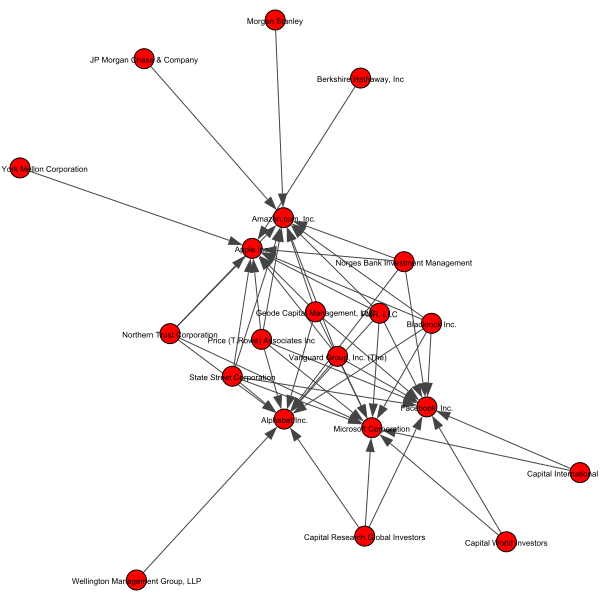

In [20]:
g.vs["label"] = g.vs["name"]
ig.plot(g, vertex_label_size = 8, verzex_size = 5, weighted = True)